# CNNs Basic implementation

In this notebook, I have implemented a simple CNN to classify images on 2 famous datasets: MNIST and CIFAR-10

## MNIST

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data = mnist.load_data()

In [4]:
(X_train, y_train), (X_test, y_test) = data # This is the way to extract MNIST data from the Keras datasets 

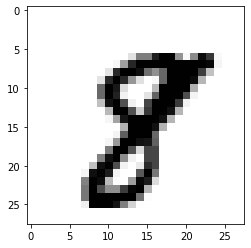

In [7]:
plt.imshow(X_train[55], cmap = 'gray_r')

### Categorization

If we don't categorize the y-values, the network believes its a regression problem, meaning 9 > 5. However, 9 is not > 5, as they are just labels for 2 separate categories

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
y_test_categorical = to_categorical(y_test, num_classes = 10)
y_train_categorical = to_categorical(y_train, num_classes = 10)

In [9]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
# We want to make it into a generalized 3-shape image, so we can reshape to (Num_Images, Width, Height, Color channels)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [14]:
model = Sequential()

# Conv
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape = (28, 28, 1), activation = 'relu'))

# Pool
model.add(MaxPooling2D(pool_size = (2, 2), strides = 1))

# Flatten
model.add(Flatten())

# Dense
model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [15]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2166912   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,169,034
Trainable params: 2,169,034
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, epochs = 2)


Epoch 1/3
60000/60000 [==============================] - 113s 2ms/step - loss: 0.1101 - accuracy: 0.9667
Epoch 2/3
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0401 - accuracy: 0.9872
Epoch 3/3
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0243 - accuracy: 0.9919


In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 261us/step


[0.04307099688278686, 0.9860000014305115]

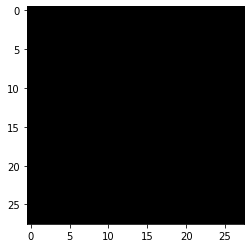

In [73]:
img = np.zeros((28, 28, 1))
plt.imshow(img, cmap = 'gray')

In [74]:
img[2:24, 12:15] = 255

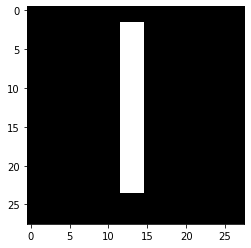

In [75]:
img = img / 255
plt.imshow(img, cmap = 'gray')

In [76]:
img.shape

(28, 28, 1)

In [77]:
images = [img]
type(images)
images = np.asarray(images)
images.shape

(1, 28, 28, 1)

In [78]:
a = model.predict_classes(images)
print(a)

[1]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# CIFAR-10

In [88]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 42s 0us/step


In [89]:
X_train.shape

(50000, 32, 32, 3)

In [90]:
X_train = X_train / 255
X_test = X_test / 255

In [91]:
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [92]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [93]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [95]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               295168    
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [96]:
model.fit(X_train, y_train_categorical, verbose = 1, epochs = 3)

Epoch 1/3
50000/50000 [==============================] - 53s 1ms/step - loss: 1.4471 - accuracy: 0.4774
Epoch 2/3
50000/50000 [==============================] - 50s 993us/step - loss: 1.0891 - accuracy: 0.6162
Epoch 3/3
50000/50000 [==============================] - 50s 994us/step - loss: 0.9304 - accuracy: 0.6730


In [97]:
model.evaluate(X_test, y_test_categorical)

10000/10000 [==============================] - 3s 332us/step


[0.9156870973587036, 0.6818000078201294]

In [98]:
print(classification_report(y_test, model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1000
           1       0.79      0.78      0.78      1000
           2       0.61      0.52      0.56      1000
           3       0.49      0.49      0.49      1000
           4       0.60      0.64      0.62      1000
           5       0.61      0.57      0.59      1000
           6       0.75      0.75      0.75      1000
           7       0.71      0.75      0.73      1000
           8       0.81      0.76      0.79      1000
           9       0.71      0.82      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

